# Import thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Điều chính kích thước và độ phóng chung cho các biểu đồ trong bài tập này.

In [2]:
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['figure.dpi'] = 100

Đọc dữ liệu

In [3]:
train = pd.read_csv('../data/train_preprocessed.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
test = pd.read_csv('../data/test_preprocessed.csv')
test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,0.0,0,5,0,1,1,0,0.0,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,0.0,0,5,0,1,1,0,0.0,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,0.0,0,5,0,1,1,0,0.0,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,0.0,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,121.00,324


# Khám phá dữ liệu

## Tỷ lệ nam và nữ trong các hộ gia đình

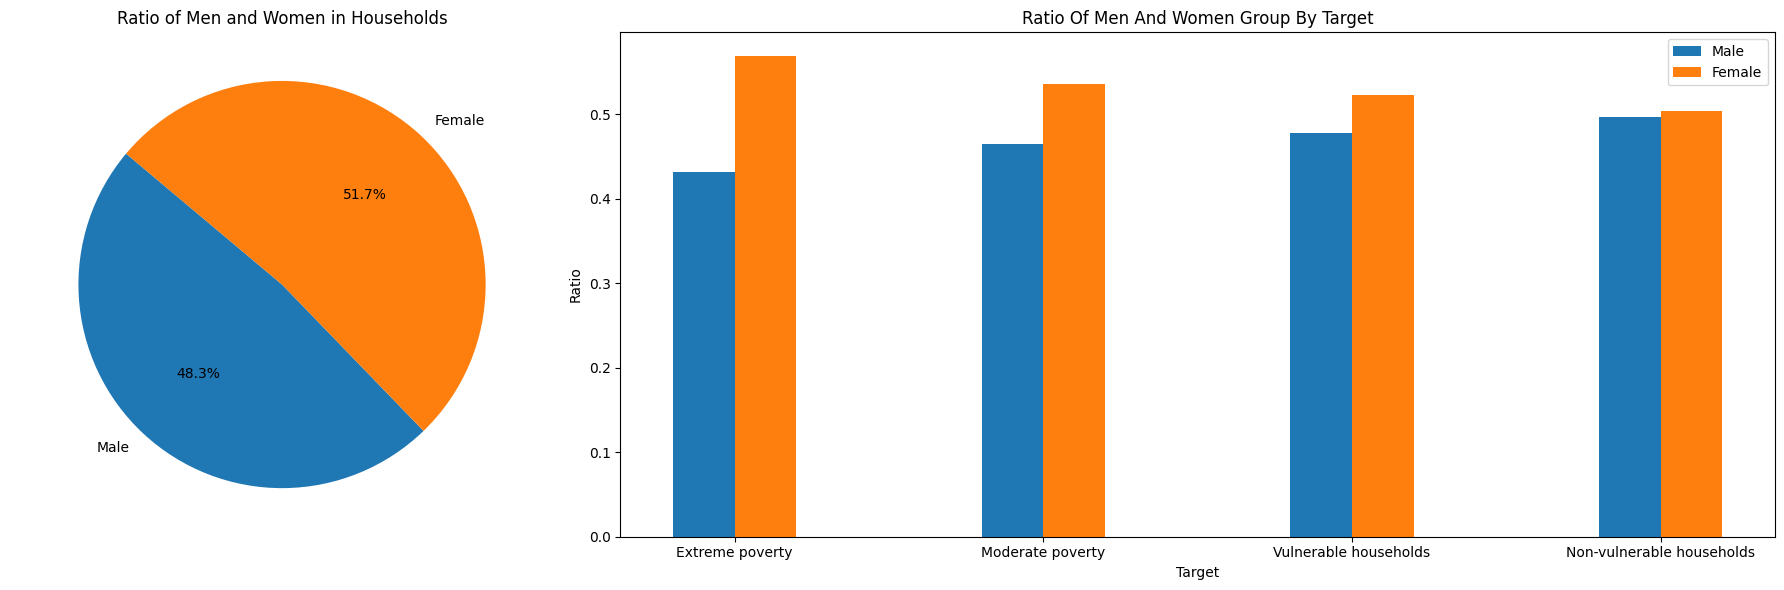

In [5]:
total_males = train['male'].sum()
total_females = train['female'].sum()

male_ratio = total_males / (total_males + total_females)
female_ratio = total_females / (total_males + total_females)

labels = ['Male', 'Female']
colors = ['#1f77b4', '#ff7f0e']
sizes_pie = [male_ratio.mean(), female_ratio.mean()]

# Pie chart
plt.figure(figsize=(18, 6))  
plt.subplot2grid((1, 3), (0, 0)) 
plt.pie(sizes_pie, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of Men and Women in Households')
plt.axis('equal')

# Bar chart
male_by_target = train.groupby('Target')['male'].sum()
female_by_target = train.groupby('Target')['female'].sum()

male_ratio = male_by_target / (male_by_target + female_by_target)
female_ratio = female_by_target / (male_by_target + female_by_target)

labels_bar = ['Extreme poverty', 'Moderate poverty', 'Vulnerable households', 'Non-vulnerable households']
index_bar = np.arange(len(labels_bar))
bar_width = 0.2

plt.subplot2grid((1, 3), (0, 1), colspan=2)
plt.bar(index_bar, male_ratio, bar_width, label=labels[0], color=colors[0])
plt.bar(index_bar + bar_width, female_ratio, bar_width, label=labels[1], color=colors[1])
plt.xlabel('Target')
plt.ylabel('Ratio')
plt.title('Ratio Of Men And Women Group By Target')
plt.xticks(index_bar + bar_width / 2, labels_bar)

plt.legend()
plt.tight_layout()
plt.show()

#### Nhận xét
- Tỷ lệ nam và nữ trong các hộ gia đình không có sự chênh lệch lớn, số lượng nữ giới chiếm khoảng 51%.
- Kết hợp với cột 'Target' để thấy được tỉ lệ giữa nam và nữ của từng mức độ nghèo. Sự chênh lệch này không quá lớn, từ 1 - 10%
- Sự chênh lệch lớn nhất giữa nam và nữ trong các hộ gia đình ở cấp độ Extreme poverty, đồng thời sự chênh lệch này có xu hướng giảm dần từ Exemte poverty đến Non-vulnerable households.

### Tỷ lệ phụ thuộc ứng với từng mức độ nghèo

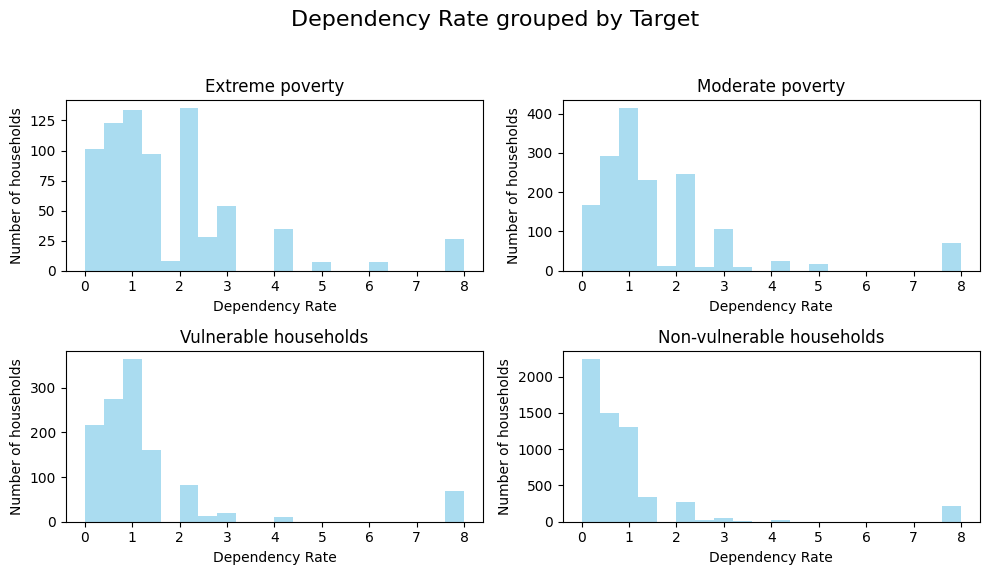

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
labels = ['Extreme poverty', 'Moderate poverty', 'Vulnerable households', 'Non-vulnerable households']

for i, target in enumerate([1, 2, 3, 4]):
    ax = axs[i // 2, i % 2]
    ax.hist(train[train['Target'] == target]['dependency'], bins=20, color='skyblue', alpha=0.7)
    ax.set_title(labels[i])
    ax.set_xlabel('Dependency Rate')
    ax.set_ylabel('Number of households')

plt.suptitle('Dependency Rate grouped by Target', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()

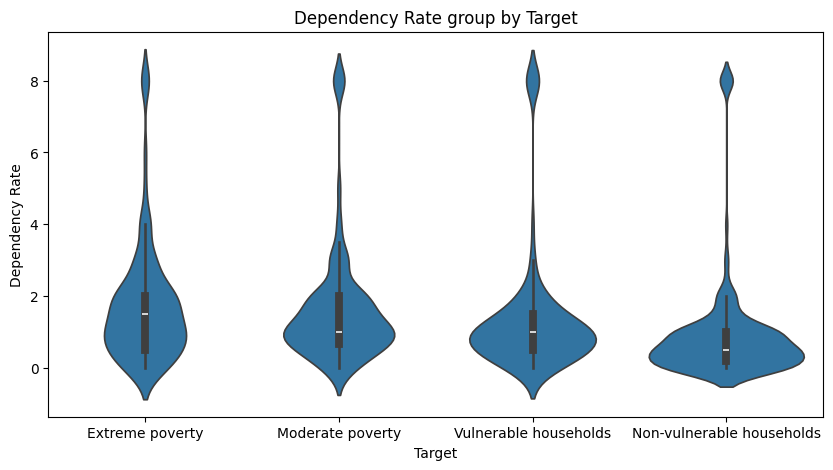

In [7]:
plt.figure(figsize=(10, 5))
labels = ['Extreme poverty', 'Moderate poverty', 'Vulnerable households', 'Non-vulnerable households']
sns.violinplot(x='Target', y='dependency', data=train)
plt.title('Dependency Rate group by Target')
plt.ylabel('Dependency Rate')
plt.xticks(ticks=[0, 1, 2, 3], labels=labels)
plt.show()

#### Nhận xét
- Đối với các hộ gia đình thuộc mức độ nghèo cao nhất (Extreme poverty)
    + Tỉ lệ phụ thuộc có số lượng nhiều phân bố chủ yếu ở 2
    + Tỷ lệ phụ thuộc phân bố tập trung từ 0 - 1.5 và 2 - 3
- Đối với các hộ gia đình thuộc mức độ nghèo thấp hơn
    + Tỉ lệ phụ thuộc có số lượng nhiều phân bố chủ yếu ở 1
    + Tỷ lệ phụ thuộc phân bố tập trung từ 0 - 1.5 và 2 - 2.5
- Đối với các hộ gia đình thuộc Vulnerable households
    + Tỉ lệ phụ thuộc có số lượng nhiều phân bố chủ yếu ở 1.
    + Tỷ lệ phụ thuộc phân bố tập trung từ 0 - 1.5
- Đối với các hộ gia đình thuộc Non-vulnerable households
    + Tỉ lệ phụ thuộc có số lượng nhiều phân bố chủ yếu ở 0.
    + Tỷ lệ phụ thuộc phân bố tập trung từ 0 - 1
- Ta có thể thấy, tỉ lệ phụ thuộc có xu hướng giảm dần từ Extreme poverty đến Non-vulnerable households

### Số lượng các loại nhà ở ứng với từng mức độ nghèo

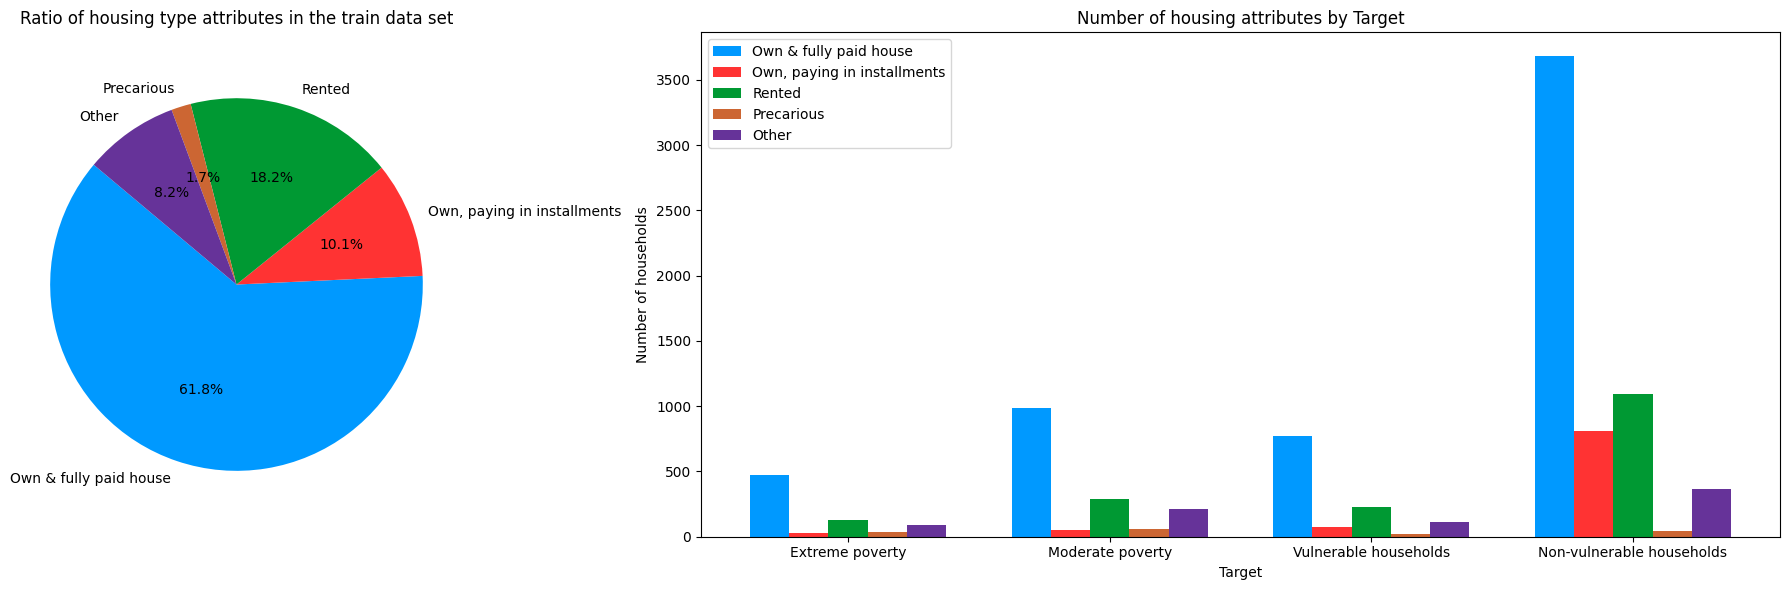

In [8]:
total_houses = sum(train[f'tipovivi{i}'].sum() for i in range(1, 6))

sizes = [train[f'tipovivi{i}'].sum() for i in range(1, 6)]
labels = ['Own & fully paid house', 'Own, paying in installments', 'Rented', 'Precarious', 'Other']
colors = ['#0099FF', '#FF3333', '#009933', '#CC6633', '#663399']
percentages = [100 * size / total_houses for size in sizes]

# Pie chart
plt.figure(figsize=(18, 6))  
plt.subplot2grid((1, 3), (0, 0)) 
plt.pie(percentages, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of housing type attributes in the train data set')
plt.axis('equal')

label = ['Extreme poverty', 'Moderate poverty', 'Vulnerable households', 'Non-vulnerable households']
index = np.arange(len(label))
bar_width = 0.15

# Bar chart
plt.subplot2grid((1, 3), (0, 1), colspan=2)
for i in range(1, 6):
    plt.bar(index + (i - 1) * bar_width, train.groupby('Target')[f'tipovivi{i}'].sum(), bar_width, label=labels[i - 1], color=colors[i - 1])

plt.xlabel('Target')
plt.ylabel('Number of households')
plt.title('Number of housing attributes by Target')
plt.xticks(index + 2*bar_width, label)
plt.legend()

plt.tight_layout()
plt.show()


#### Nhận xét:
- Số lượng hộ gia đình sống trong các căn nhà đã được trả hết tiền và sở hữu chiếm tỷ lệ lớn nhất, chiếm khoảng 62%.
- Hầu hết các hộ gia đình sống trong các căn nhà đã trả hết tiền và sở hữu đều thuộc Nhóm không dễ tổn thương.